# Linear Regression

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,Lasso,Ridge,RidgeCV,LassoCV,ElasticNet,ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# importing data
data=pd.read_csv("Admission_Prediction.csv")

# chscking top 5 data
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [3]:
#checking descriptive statistics of the columns
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [4]:
#checking for missing value
data.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [5]:
# filling missing values
data["GRE Score"]=data["GRE Score"].fillna(data["GRE Score"].mean())
data["TOEFL Score"]=data["TOEFL Score"].fillna(data["TOEFL Score"].mean())
data["University Rating"]=data["University Rating"].fillna(data["University Rating"].mode()[0])

In [6]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Now the data looks good and there are no missing values. Also, the first cloumn is just serial numbers, so we don' need that column. Let's drop it from data and make it more clean.

In [7]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [8]:
#dropping unnecessary columns
data.drop(['Serial No.'],inplace=True,axis=1)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


Let's visualize the data and analyze the relationship between independent and dependent variables:

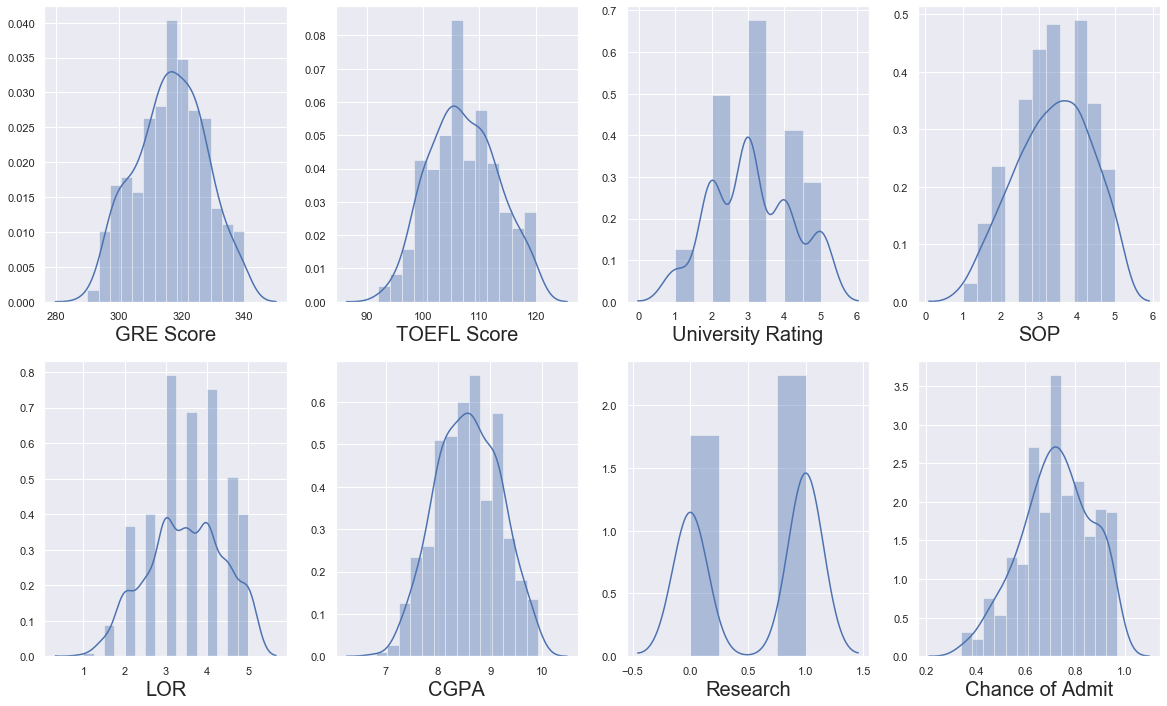

In [9]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in data:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1

The data distribution looks decent enough and there doesn't seem to be any skewness. Great let's go ahead!

Let's observe the relationship between independent variables and dependent variable.


In [10]:
X=data.drop(["Chance of Admit"],axis=1)
y=data["Chance of Admit"]

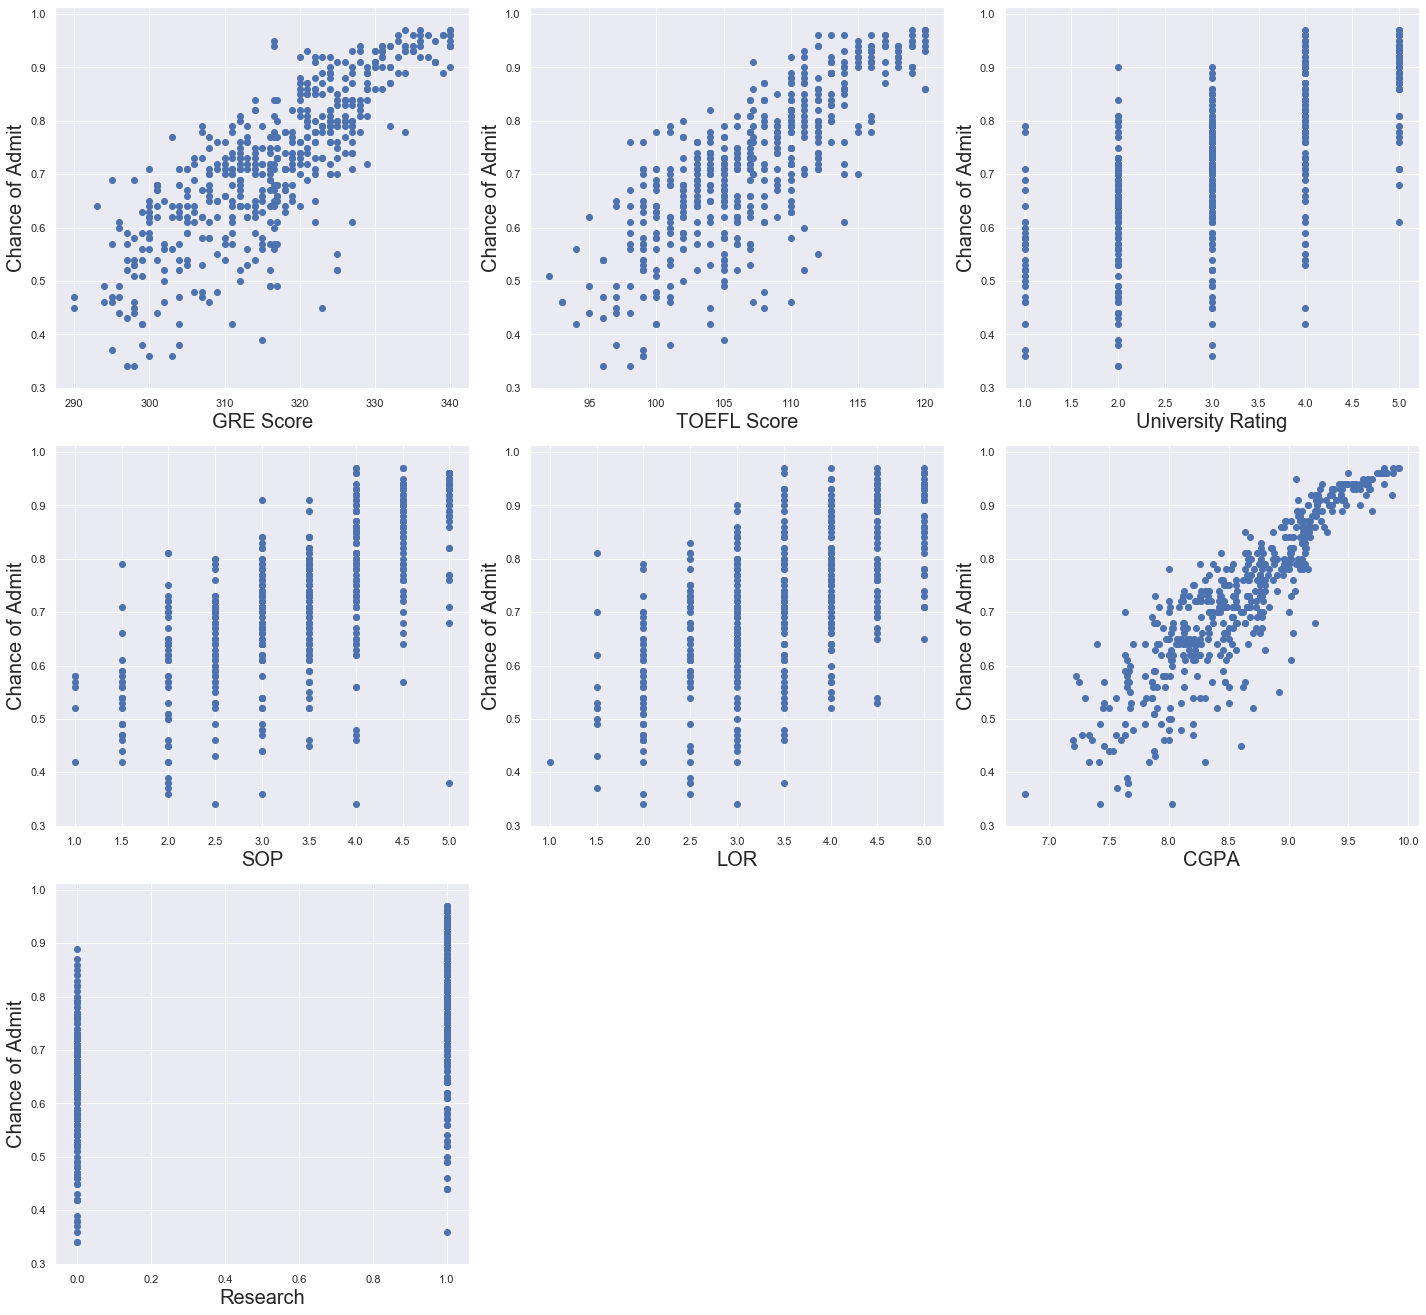

In [11]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=10 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Great, the relationship between the dependent and independent variables look fairly linear.
Thus, our linearity assumption is satisfied.

Let's move ahead and check for multicollinearity.

In [12]:
# converting all data into same scale
sc=StandardScaler()
X_scale=sc.fit_transform(X)

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=X_scale
# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do q 
vif=pd.DataFrame()
# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [14]:
vif

,VIF,Features
0,4.152735,GRE Score
1,3.793345,TOEFL Score
2,2.517272,University Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


Here, we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. We don't any VIF greater than 5 , so we are good to go.

Great. Let's go ahead and use linear regression and see how good it fits our data. But first. let's split our data in train and test.

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X_scale,y,test_size=0.3,random_state=200)

In [16]:
X_train

array([[ 0.94125895,  1.78854223,  0.78200955, ...,  1.63976333,
         1.80990747,  0.88640526],
       [ 0.76096251,  0.79603295,  0.78200955, ...,  0.55812525,
         0.70101723,  0.88640526],
       [ 0.12992496,  0.29977831, -0.10462259, ...,  0.55812525,
         1.06513044,  0.88640526],
       ...,
       [-2.03363234, -2.01607667, -1.87788687, ..., -2.14596996,
        -1.54986443, -1.12815215],
       [-0.05037148,  0.46519653, -0.10462259, ...,  1.09894429,
         0.33690402,  0.88640526],
       [-0.41096436, -0.19647633, -0.10462259, ...,  0.01730621,
         0.35345462,  0.88640526]])

In [17]:
y_train

446    0.93
307    0.80
68     0.68
335    0.83
442    0.92
       ... 
298    0.90
324    0.67
272    0.49
105    0.69
282    0.81
Name: Chance of Admit, Length: 350, dtype: float64

In [18]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
import pickle
# saving the model to the local file system
filename="finalized_model.pickle"
pickle.dump(lr, open(filename,"wb"))

In [21]:
# prediction using the saved model
loaded_model=pickle.load(open(filename,"rb"))
a=loaded_model.predict(sc.transform([[300,110,5,5,5,10,1]]))
a

array([0.92975389])

In [22]:
lr.score(X_train,y_train)

0.823668424100839

In [23]:
lr.score(X_test,y_test)

0.8073721032142418

So it looks like our model r2 score is less on the test data.

Let's see if our model is overfitting our training data.

In [24]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lascv=LassoCV(alphas=None,cv=10,max_iter=100000,normalize=True)
lascv.fit(X_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [25]:
# best alpha parameter
alpha=lascv.alpha_
alpha

6.619308157871953e-06

In [26]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before
lasso_reg=Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=6.619308157871953e-06, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [27]:
lasso_reg.score(X_test,y_test)

0.8073745952822972

our r2_score for test data (80.73%) comes same as before using regularization. So, it is fair to say our OLS model did not overfit the data.

In [28]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them
alphas=np.random.uniform(low=0,high=10,size=(50,))
rigcv=RidgeCV(alphas,normalize=True,cv=10)
rigcv.fit(X_train,y_train)

RidgeCV(alphas=array([2.69636775, 6.05207615, 2.49823728, 9.81520459, 3.43087195,
       5.51353234, 4.05575444, 4.45185563, 9.14071061, 4.13167641,
       8.20501561, 5.37170159, 6.10698503, 7.73308498, 3.43329517,
       5.10750826, 5.51896031, 2.84739713, 4.21476435, 9.01409674,
       6.02995429, 2.59435479, 1.02752684, 4.45916212, 5.3504433 ,
       6.52922676, 1.48184113, 0.86704205, 6.13497916, 8.09735838,
       8.52061312, 2.88600089, 0.98729118, 1.11188688, 4.33211746,
       2.89483404, 0.72496416, 9.59306905, 2.65926765, 5.87299134,
       7.83517679, 2.13990495, 5.10761741, 6.0915754 , 6.31314204,
       0.84997303, 2.07522679, 2.65181143, 5.69678726, 1.17348894]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [29]:
alpha=rigcv.alpha_
alpha

0.7249641568919796

In [30]:
ridge_model=Ridge(alpha)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.7249641568919796, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [31]:
ridge_model.score(X_test, y_test)

0.8073562113319748

we got the same r2 square using Ridge regression as well. So, it's safe to say there is no overfitting.

In [32]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [33]:
alpha=elasticCV.alpha_
alpha

0.0002615135432893125

In [34]:
elastic_model=ElasticNet(alpha)
elastic_model.fit(X_train,y_train)

ElasticNet(alpha=0.0002615135432893125, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [35]:
elastic_model.score(X_test,y_test)

0.8074184634708004

So, we can see by using different type of regularization, we still are getting the same r2 score. That means our OLS model has been well trained over the training data and there is no overfitting.